# SENTIMENT ANALYSIS - TEXTBLOB

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
csx = pd.read_csv("C:\\Users\\Administrator\\Desktop\\CUSTOMER SURVEYS\\CUSTOMER SERVICE WEEK FEEDBACK.csv", lineterminator='\n', parse_dates=True)
csx

In [66]:
!pip install wordcloud
!pip install vaderSentiment

You should consider upgrading via the 'c:\users\administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


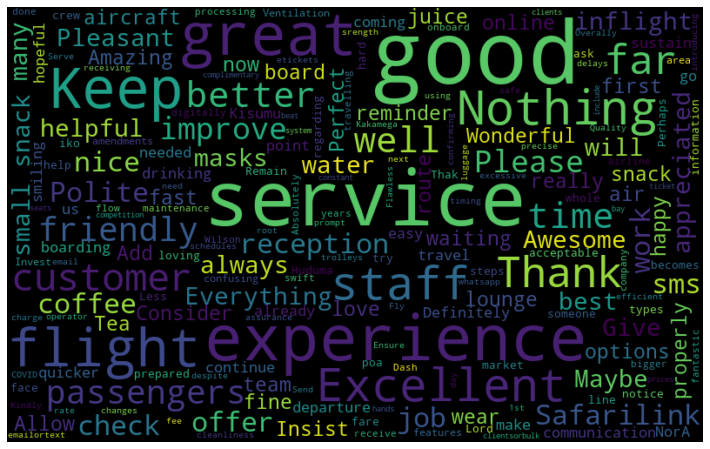

In [67]:
# visualize the frequent words

import matplotlib.pyplot as plt

all_words = " ".join([sentence for sentence in csx['COMMENT\r']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Though positive sentiment is derived with the compound score >= 0.05, we always have an option to determine the positive, negative & neutrality of the sentence, by changing these scores

In [68]:
!pip install textblob

You should consider upgrading via the 'c:\users\administrator\anaconda3\python.exe -m pip install --upgrade pip' command.


In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [70]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
csx['Polarity'] = csx['COMMENT\r'].apply(get_polarity)

In [74]:
csx['Sentiment_Type']=''
csx.loc[csx.Polarity>0,'Sentiment_Type']='POSITIVE'
csx.loc[csx.Polarity==0,'Sentiment_Type']='NEUTRAL'
csx.loc[csx.Polarity<0,'Sentiment_Type']='NEGATIVE'

csx

,NAME,MOBILE,EMAIL,COMMENT\r,Polarity,Sentiment_Type
0,Claude,714380827,NaN,"Pleasant flight, Polite staff. Please offer a ...",0.241667,POSITIVE
1,Peter Njeru,NaN,NaN,The lounge\r,0.000000,NEUTRAL
2,Anne Gichure,725932295,NaN,"My experience so far has been great. Thak you,...",0.425000,POSITIVE
3,Burugu M,NaN,NaN,Insist on passengers to wear masks properly\r,0.000000,NEUTRAL
4,Burugu P,NaN,NaN,Insist on passengers to wear masks properly\r,0.000000,NEUTRAL
...,...,...,...,...,...,...
167,Jane Gichara,727551610,NaN,It was a nice reception\r,0.600000,POSITIVE
168,Grace Wangu,722805797,NaN,So far the experience has been amazing\r,0.350000,POSITIVE
169,Silva,NaN,NaN,\r,0.000000,NEUTRAL
170,Caleb Luyai,726434179,calebamisi2017@gmail.com,Good work\r,0.700000,POSITIVE


<AxesSubplot:title={'center':'Sentiment Analysis'}>

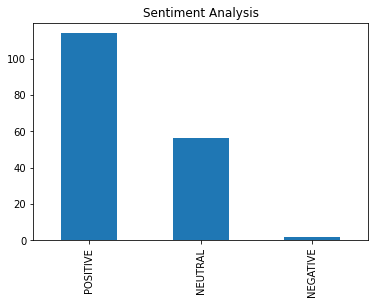

In [75]:
csx.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

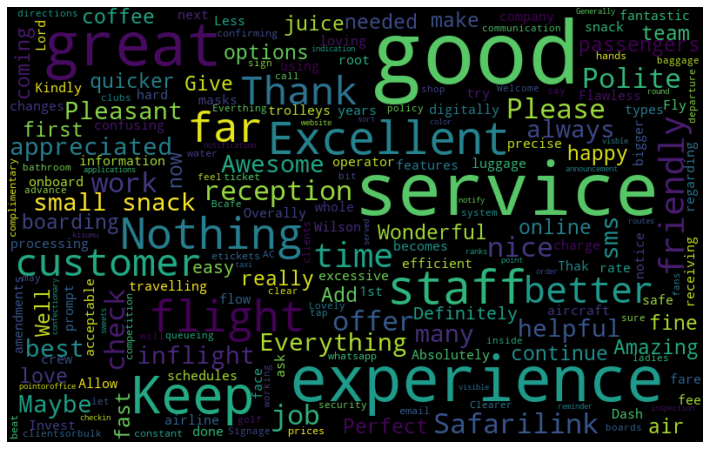

In [89]:
# frequent words visualization for +ve
positive = " ".join([sentence for sentence in csx['COMMENT\r'][csx['Sentiment_Type']== 'POSITIVE']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

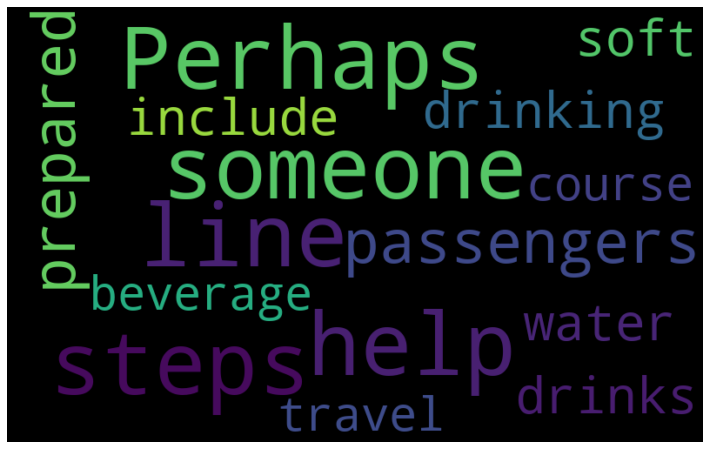

In [88]:
# frequent words visualization for -ve
negative = " ".join([sentence for sentence in csx['COMMENT\r'][csx['Sentiment_Type']== 'NEGATIVE']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(negative)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

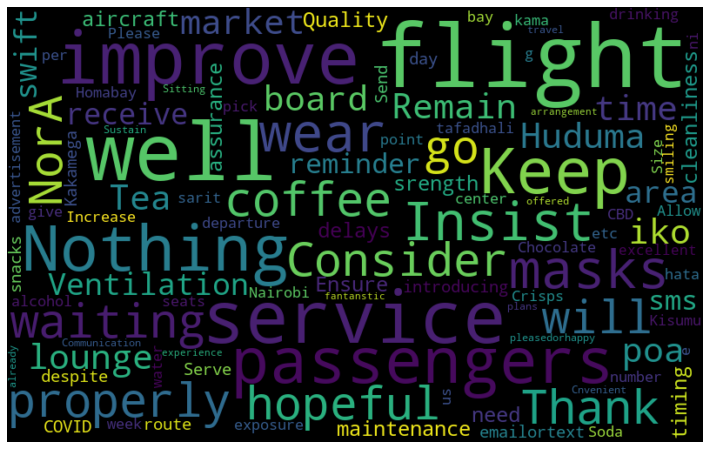

In [90]:
# frequent words visualization for +ve
neutral = " ".join([sentence for sentence in csx['COMMENT\r'][csx['Sentiment_Type']== 'NEUTRAL']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neutral)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()